<a href="https://colab.research.google.com/github/Somu-Gen/WQI_Streamlit/blob/main/Prediction_Vellore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

import plotly.express as px

In [ ]:
#df.groupby(['Regional Office']).count()['DO'].to_frame()

In [ ]:
#df.groupby(['Regional Office']).count()['DO'].plot(kind= 'pie')

In [ ]:
#df.groupby(['Regional Office']).count()['DO'].plot(kind='bar')

#Reading data

In [ ]:
df2=pd.read_csv("/content/F_Final_vellore_data_wqi.csv",index_col=[0])

In [ ]:
df2.corr()

,TDS,Nitrates,Ca,Mg,Na,K,Cl,SO4,F,pH,wqi
TDS,1.000000,-0.126781,-0.145531,-0.038167,-0.136926,-0.003686,0.122187,-0.175853,0.014208,0.036291,0.013962
Nitrates,-0.126781,1.000000,0.260446,0.234310,0.288432,0.071551,0.167780,0.317032,-0.049167,-0.102050,-0.014494
Ca,-0.145531,0.260446,1.000000,0.267025,0.263003,0.057344,0.261287,0.317098,-0.080756,-0.303234,-0.061514
Mg,-0.038167,0.234310,0.267025,1.000000,0.322638,0.078336,0.345870,0.352700,0.040404,-0.113067,0.099488
Na,-0.136926,0.288432,0.263003,0.322638,1.000000,0.104808,0.428086,0.463801,0.008068,-0.100134,0.046120
K,-0.003686,0.071551,0.057344,0.078336,0.104808,1.000000,0.107482,0.023463,-0.026535,0.079673,0.110722
Cl,0.122187,0.167780,0.261287,0.345870,0.428086,0.107482,1.000000,0.248297,-0.042178,-0.089197,-0.004943
SO4,-0.175853,0.317032,0.317098,0.352700,0.463801,0.023463,0.248297,1.000000,0.043825,-0.223624,0.061022
F,0.014208,-0.049167,-0.080756,0.040404,0.008068,-0.026535,-0.042178,0.043825,1.000000,0.054644,0.985589
pH,0.036291,-0.102050,-0.303234,-0.113067,-0.100134,0.079673,-0.089197,-0.223624,0.054644,1.000000,0.136658


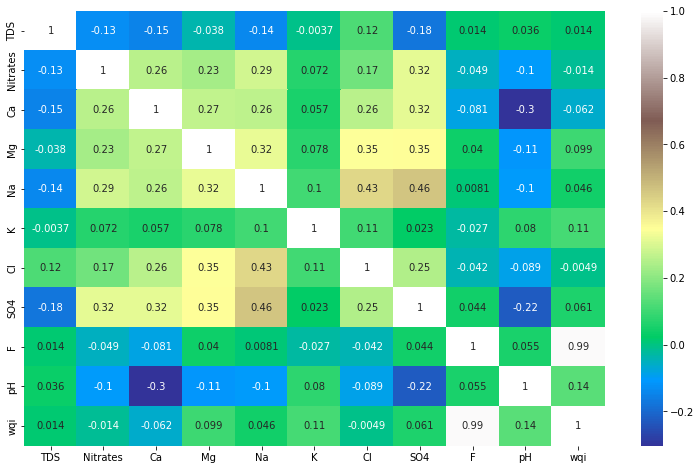

In [ ]:
plt.figure(figsize=(13,8))
sns.heatmap(df2.corr(),annot=True,cmap='terrain')
plt.show()

In [ ]:
df2.head(2)

,Tahsil/Taluk,Village,Latitude,Longitude,Date_of_collection,TDS,Nitrates,Ca,Mg,Na,K,Cl,SO4,F,pH,wqi,quality
0,Gudiyatham,Gudiyatham,"12°56'40""","78°52'10""",01-06-1981,384.519457,13.176923,52.000000,37.0,143.000000,5.964226,170.00000,121.005792,0.626931,8.0,62.016553,Poor
1,Katpadi,Arumparuthi,"12°58'05""","79°12'25""",01-06-1981,384.519457,13.176923,58.751131,78.0,186.750398,5.964226,189.03291,121.005792,0.626931,7.4,60.684614,Poor


In [ ]:
df2.columns

Index(['Tahsil/Taluk', 'Village', 'Latitude', 'Longitude',
       'Date_of_collection', 'TDS', 'Nitrates', 'Ca', 'Mg', 'Na', 'K', 'Cl',
       'SO4', 'F', 'pH', 'wqi', 'quality'],
      dtype='object')

In [ ]:
df2=df2.drop(['Tahsil/Taluk', 'Village', 'Latitude', 'Longitude',
       'Date_of_collection','quality'], axis=1)

In [ ]:
#df2=df2.drop(index=0,axis=1)
df2.head()

,TDS,Nitrates,Ca,Mg,Na,K,Cl,SO4,F,pH,wqi
0,384.519457,13.176923,52.000000,37.0,143.000000,5.964226,170.00000,121.005792,0.626931,8.0,62.016553
1,384.519457,13.176923,58.751131,78.0,186.750398,5.964226,189.03291,121.005792,0.626931,7.4,60.684614
2,384.519457,13.176923,184.000000,73.0,239.000000,5.964226,189.03291,121.005792,0.626931,7.4,62.258597
3,384.519457,13.176923,58.000000,21.0,60.000000,5.964226,39.00000,121.005792,0.626931,8.1,61.555553
4,384.519457,13.176923,40.000000,38.0,115.000000,5.964226,46.00000,121.005792,0.626931,8.0,61.693762


In [ ]:
#models
df2.isnull().sum(axis = 0)

TDS           0
Nitrates      0
Ca            0
Mg            0
Na            0
K           127
Cl            0
SO4           0
F             0
pH            0
wqi           0
dtype: int64

In [ ]:
df2['K'].fillna((df2['K'].mean()), inplace=True)

In [ ]:
X = df2.drop('wqi', axis=1)
y = df2.wqi

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
y_test.shape

(1191,)

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train , y_train)
y_pred = lm.predict(x_test)
y_pred

array([110.85204721,  42.05610855,  25.32795265, ...,  54.79108503,
        72.12731882,  57.88186311])

In [ ]:
import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(lm)
pickle.dump(lm, open("lm2.pkl", "wb"))
# Load the pickled model
imported_model = pickle.loads(saved_model)
 
# Use the loaded pickled model to make predictions
imported_model.predict(x_test)

array([110.85204721,  42.05610855,  25.32795265, ...,  54.79108503,
        72.12731882,  57.88186311])

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,y_pred))
print('R2:',metrics.r2_score(y_test, y_pred))

Mean Absolute Error(MAE): 0.25811446987347314
Mean Squared Error(MSE): 0.46949077333526135
Root Mean Squared Error (RMSE): 0.6851939676728491
Explained Variance Score (EVS): 0.9997401155632862
R2: 0.9997400805877092


In [ ]:
df2.shape

(3969, 11)

In [ ]:
df2.drop(df2[df2['wqi'] > 300].index, inplace = True)

In [ ]:
X = df2.drop('wqi', axis=1)
y = df2.wqi
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
X_train.head()

,TDS,Nitrates,Ca,Mg,Na,K,Cl,SO4,F,pH
3779,726.000000,10.0,34.0,44.955000,150.000000,5.000000,230.00000,115.000000,0.850000,8.5
365,914.000000,7.0,32.0,45.000000,253.000000,3.000000,241.00000,70.000000,0.626931,9.1
3886,384.519457,7.0,180.0,52.247294,186.750398,17.000000,189.03291,121.005792,0.950000,8.0
2076,384.519457,42.0,48.0,56.000000,276.000000,4.000000,326.00000,132.000000,0.460000,8.0
3396,384.519457,20.0,64.0,51.030000,273.000000,5.964226,355.00000,152.000000,0.050000,8.2


Change features here to get different plots

In [ ]:
x_ph = X_train['F'].values.reshape(-1,1) 
#y_ph=y_test.values

In [ ]:
#x_ph

In [ ]:
ln = LinearRegression()
ln.fit(x_ph , y_train)
y_ph = ln.predict(x_ph)

In [ ]:
print('MSE:',metrics.mean_squared_error(y_train, y_ph))
print('R2:',metrics.r2_score(y_train, y_ph))

MSE: 29.06648051700379
R2: 0.9554888567712699


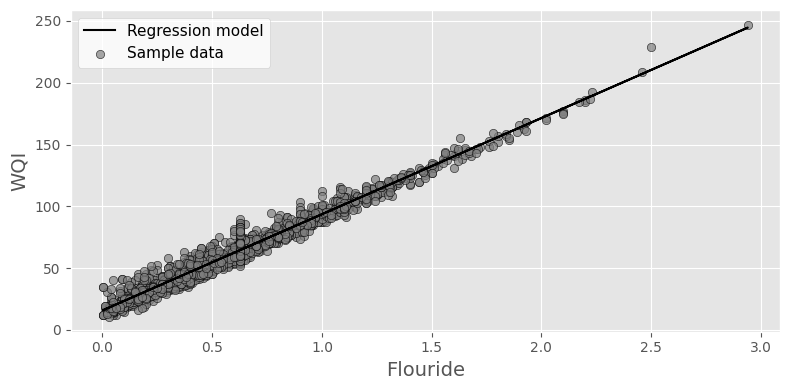

In [ ]:
plt.style.use('default')
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x_ph, y_ph, color='k', label='Regression model')
ax.scatter(x_ph, y_train, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('WQI', fontsize=14)
ax.set_xlabel('Flouride', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
fig.tight_layout()

In [ ]:
df3 = pd.DataFrame(data = x_ph,  
                        columns = ["F"])

In [ ]:
df3['Wqi_pred']=y_ph.tolist()
df3.head()

,F,Wqi_pred
0,0.850000,81.978803
1,0.626931,64.620461
2,0.950000,89.760397
3,0.460000,51.630586
4,0.050000,19.726049


In [ ]:
#y_test.plot()

In [ ]:
print('R2 rounded:',(metrics.r2_score(y_test, y_pred)).round(2))
r2 = r2_score(y_test, y_pred)
r2_rounded = r2_score(y_test, y_pred).round(2)

R2 rounded: -2.67


With all features

In [ ]:
lm = LinearRegression()
lm.fit(X_train , y_train)
yl_pred = lm.predict(x_test)

In [ ]:
print('MSE:',metrics.mean_squared_error(y_test, yl_pred))
print('R2:',metrics.r2_score(y_test, yl_pred))

MSE: 0.39900360307784005
R2: 0.9993716989215303


In [ ]:
import numpy as np
lx=len(y_test)
axis=np.linspace(0, lx+1, lx)

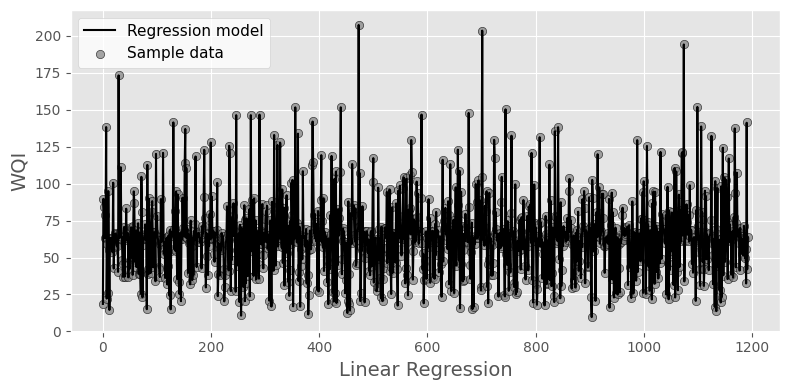

In [ ]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(axis,yl_pred, color='k', label='Regression model')
ax.scatter(axis, y_test, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('WQI', fontsize=14)
ax.set_xlabel('Linear Regression', fontsize=14)
#ax.set_xlabel('Flouride', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
fig.tight_layout()

In [ ]:
from sklearn.linear_model import Ridge

model_ridge = Ridge()
model_ridge.fit(X_train , y_train)
yr_pred = model_ridge.predict(x_test)
yr_pred

array([ 18.76335763,  89.59149622,  83.57173928, ..., 140.90670486,
        42.1168448 ,  63.71557357])

In [ ]:
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, yr_pred))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, yr_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, yr_pred)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,yr_pred))
print('R2:',metrics.r2_score(y_test, yr_pred))

Mean Absolute Error(MAE): 0.2550032959405521
Mean Squared Error(MSE): 0.4056593419857583
Root Mean Squared Error (RMSE): 0.6369139203893712
Explained Variance Score (EVS): 0.9993624016723537
R2: 0.9993612182945345


In [ ]:
yr_pred.shape

(1191,)

In [ ]:
import numpy as np
axis=np.linspace(0, 1192, 1191)

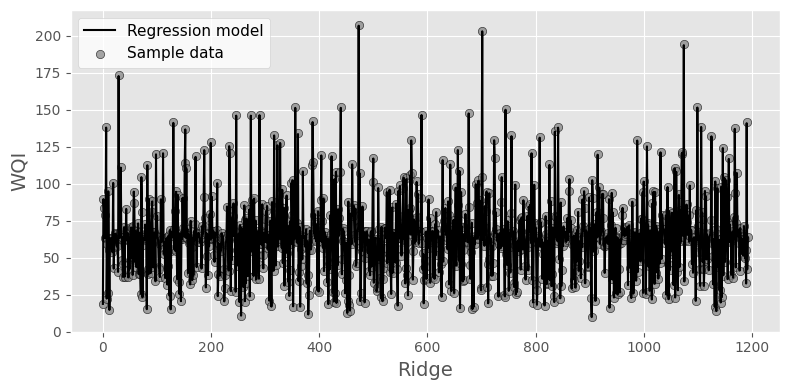

In [ ]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(axis,yr_pred, color='k', label='Regression model')
ax.scatter(axis, y_test, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('WQI', fontsize=14)
ax.set_xlabel('Ridge', fontsize=14)
#ax.set_xlabel('Flouride', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
fig.tight_layout()

In [ ]:
print(y_test)

3399     18.681457
2173     89.887910
2498     83.872405
633      78.910123
415      63.270125
           ...    
3362     55.431907
3377     32.610262
3468    141.423327
2075     42.060458
690      63.777923
Name: wqi, Length: 1191, dtype: float64


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model_DecisionTree = DecisionTreeRegressor()
model_DecisionTree.fit(X_train , y_train)
yD_pred = model_DecisionTree.predict(x_test)
yD_pred

array([ 18.68145746,  90.14021485,  82.12001116, ..., 138.40117537,
        39.75194506,  67.30588951])

In [ ]:
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, yD_pred))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, yD_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, yD_pred)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,yD_pred))
print('R2:',metrics.r2_score(y_test, yD_pred))

Mean Absolute Error(MAE): 2.0453458937975717
Mean Squared Error(MSE): 9.315583594004686
Root Mean Squared Error (RMSE): 3.052144097844118
Explained Variance Score (EVS): 0.9853401745887179
R2: 0.9853309815411722


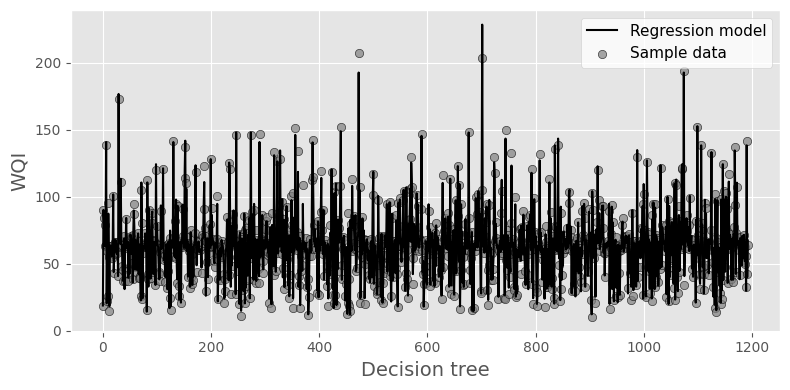

In [ ]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(axis,yD_pred, color='k', label='Regression model')
ax.scatter(axis, y_test, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('WQI', fontsize=14)
ax.set_xlabel('Decision tree', fontsize=14)
#ax.set_xlabel('Flouride', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
fig.tight_layout()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_RandomForest = RandomForestRegressor()
model_RandomForest.fit(X_train , y_train)
yRF_pred = model_RandomForest.predict(x_test)
yRF_pred

array([ 19.806524  ,  90.35145794,  81.73014694, ..., 133.32423035,
        41.96603566,  63.53110171])

In [ ]:
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(y_test, yRF_pred))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(y_test, yRF_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, yRF_pred)))
print('Explained Variance Score (EVS):',explained_variance_score(y_test,yRF_pred))
print('R2:',metrics.r2_score(y_test, yRF_pred))


Mean Absolute Error(MAE): 1.199131025970139
Mean Squared Error(MSE): 3.258160028589402
Root Mean Squared Error (RMSE): 1.8050374036538417
Explained Variance Score (EVS): 0.9949137653499701
R2: 0.9948694562054113


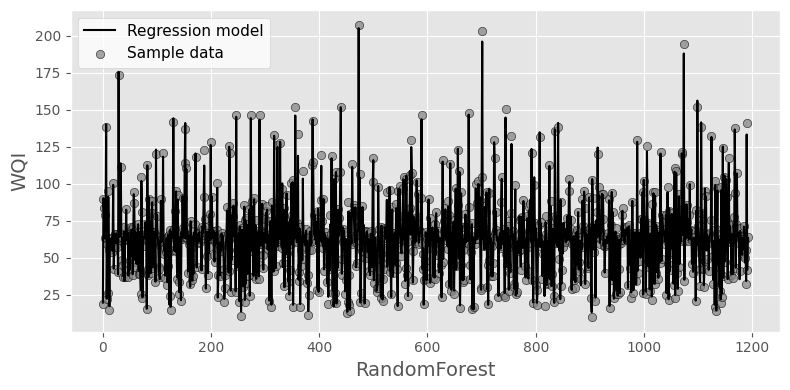

In [ ]:
plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(axis,yRF_pred, color='k', label='Regression model')
ax.scatter(axis, y_test, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('WQI', fontsize=14)
ax.set_xlabel('RandomForest', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
fig.tight_layout()

Ridge

In [ ]:
import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(model_ridge)
pickle.dump(model_ridge, open("ridge.pkl", "wb"))
# Load the pickled model
imported_model = pickle.loads(saved_model)
 
# Use the loaded pickled model to make predictions
imported_model.predict(x_test)


array([ 18.76335763,  89.59149622,  83.57173928, ..., 140.90670486,
        42.1168448 ,  63.71557357])

In [ ]:
print(y_train)

3779     82.120011
365      67.413747
3886     95.532784
2076     50.480297
3396     20.055949
           ...    
1599     54.886031
3912     98.489286
1361     80.384634
1547    112.833807
863      70.238308
Name: wqi, Length: 2776, dtype: float64


In [ ]:
print(y_test)

3399     18.681457
2173     89.887910
2498     83.872405
633      78.910123
415      63.270125
           ...    
3362     55.431907
3377     32.610262
3468    141.423327
2075     42.060458
690      63.777923
Name: wqi, Length: 1191, dtype: float64
